# Knowledge Graph Construction

Importing the necessary Libraries

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd 

### The Dataset

The Different Attributes in the dataset are: 
- <b>id : text</b>
- Artist : text 
- Album : text 
- <b>Decade : text</b>
- Sales_total : number 
- Sales_US : number
- Description : Text
- <b>Author : Text</b>


In [5]:
dataframe = pd.read_csv('../data/preprocessed.csv') 
dataframe.head(3)

,id,artist,album,decade,sales_total,sales_us,description,author
0,25-the-beatles-sgt-pepper-s-lonely-hearts-club...,The Beatles,Sgt. Pepper’s Lonely Hearts Club Band,60s,1800000,1100000,decade defined sweeping cultural paradigm shif...,Max Blau
1,24-pink-floyd-the-wall,Pink Floyd,The Wall,70s,1800000,1100000,legacy pink floyd cemented dark side moon . wa...,Clint Alwahab
2,23-michael-jackson-bad,Michael Jackson,Bad,80s,1900000,1000000,bizarre consider album five consecutive number...,Josh Jackson


### Extraction of data for the knowledge graph

The ID is the main variable to be considered over here for constructing the knowledge graph using: 
- has a relationship with Author 
- has a relationship with Decade

In [6]:
'''
Extracting out ID, Author, and Decade from the dataset
'''
id_, author, decade = [ i for i in range(25,0, -1) ], dataframe['author'], dataframe['decade']
triples = [(id_[i], author[i], decade[i]) for i in range(len(id_))]

id_ = set(id_)
author = set(author)
decade = set(decade) 

### Creation of the graph to represent the relationship between id, author and decade

<b>Networkx</b> is used for creating a graph with the <b>nodes</b> representing the attributes id, author, decade using the following colors 
- id : sky blue 
- author : orange 
- decade : green 


In [7]:
G=nx.Graph()

In [8]:
'''
Adding the id, author and decade nodes to the knowledge graph 
'''

for triple in triples:
        G.add_node(triple[0], node_color='skyblue')
        
        G.add_node(triple[1], node_color='orange')
        
        G.add_node(triple[2], node_color='green')
        
        G.add_edge(triple[0], triple[1]) #denotes the has a relationship between id and author
        G.add_edge(triple[0], triple[2]) #Denotes the has a relationship between id and decade

In [9]:
'''
Using a set, a color is assigned to every other ID, Author and Decade. 
Every other attribute is assigned a different node sizes for distinguishing as well 
'''
color_map = []
node_size = [] 
for node in G:
    if node in id_:
        color_map.append('skyblue')
        node_size.append(500)
    elif node in author:
        color_map.append('orange')
        node_size.append(750)
    else:
        color_map.append('lightgreen')
        node_size.append(2000)

After designating the nodes, a layout is chosen for the graph. (Spring layout is chosen here)

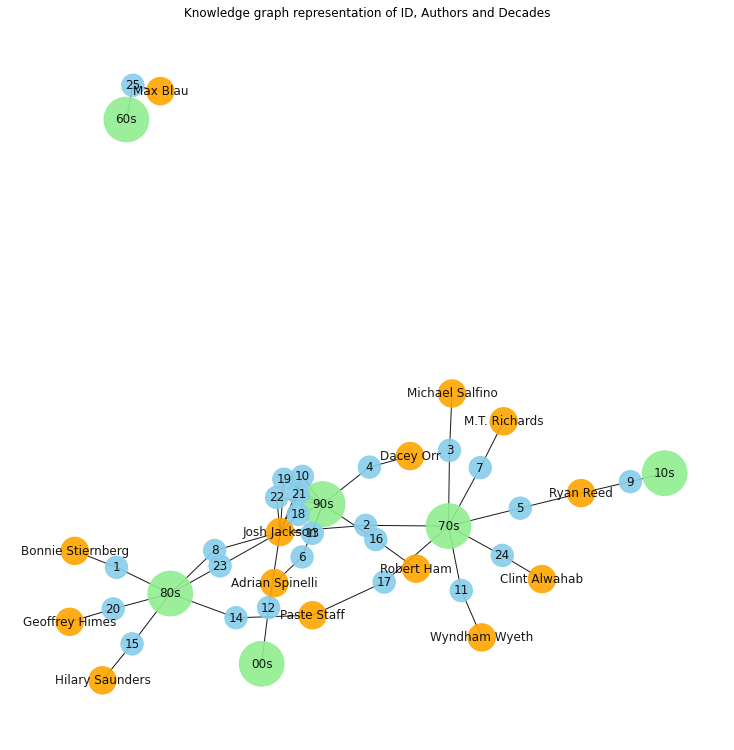

In [10]:

pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw(G, pos, edge_color='black', width=1, linewidths=1, with_labels = True,
            node_size=node_size, node_color = color_map, alpha=0.9)
plt.axis('off')
plt.title('Knowledge graph representation of ID, Authors and Decades')
plt.show()

In [12]:
'''
A more extensible way to view this graph is done using pyvis's network. 
This can be visualized using an example.html file. 

'''

from pyvis.network import Network 

net = Network(notebook=True)
net.from_nx(G)
net.show('../data/network_graph.html')